# Fine tuning of Gemini Model for our specific task with the dataset generated

### scraping of most keras pages done and most relevant 10 questions and preferred answers are taken in a json format and a dataset created for the fine tuning of the gemini pro model which is done using the google cloud services so that we can get better answers in the Generation step of rag of my application. The fine tuned model curve and loss also seen and observed that model has finetuned well to get lower mean loss for the specific questions and then asked with relevant questions for the model and seem to have got good answers also from the model

In [2]:
!gcloud auth application-default login --no-browser --client-id-file=client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.retriever,https://www.googleapis.com/auth/generative-language.tuning'

You are authorizing client libraries without access to a web browser. Please run the following command on a machine with a web browser and copy its output back here. Make sure the installed gcloud version is 372.0.0 or newer.

gcloud auth application-default login --remote-bootstrap="https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=959496487289-g01iveci34f3u1nlufbaj2s9ccklp8o1.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.retriever+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=yzxI6RmQeDzwdARfqjtU2IsAJvhCAy&access_type=offline&code_challenge=6BpkVn-QYry7wywSJI1bw5TuqsAv6X_ggIxA9vvSTpY&code_challenge_method=S256&token_usage=remote"


Enter the output of the above command: https://localhost:8085/?state=yzxI6RmQeDzwdARfqjtU2IsAJvhCAy&code=4/0AQlEd8wtcAvjggCK4NM2w_GkLGrzy1pf2G0qtk11GNjix8iCbZy3jUoXkqTi3nRAGPFIKg&scope=https://www.googl

In [3]:
!pip install google-generativeai

In [4]:
import google.generativeai as genai

print('Available base models:', [m.name for m in genai.list_models()])

Available base models: ['models/chat-bison-001', 'models/text-bison-001', 'models/embedding-gecko-001', 'models/gemini-1.0-pro-latest', 'models/gemini-1.0-pro', 'models/gemini-pro', 'models/gemini-1.0-pro-001', 'models/gemini-1.0-pro-vision-latest', 'models/gemini-pro-vision', 'models/gemini-1.5-pro-latest', 'models/gemini-1.5-pro-001', 'models/gemini-1.5-pro', 'models/gemini-1.5-pro-exp-0801', 'models/gemini-1.5-pro-exp-0827', 'models/gemini-1.5-flash-latest', 'models/gemini-1.5-flash-001', 'models/gemini-1.5-flash-001-tuning', 'models/gemini-1.5-flash', 'models/gemini-1.5-flash-exp-0827', 'models/gemini-1.5-flash-8b-exp-0827', 'models/embedding-001', 'models/text-embedding-004', 'models/aqa']


In [5]:
for model_info in genai.list_tuned_models():
    print(model_info.name)

tunedModels/increment-5aogvgj0bbjf
tunedModels/increment-9cj8gbmi8ahh
tunedModels/ftgemmafordlrandomlr00005bs16ec10-xgo8a9
tunedModels/ftgfordllr00001bs8ec50-kzo5by6qiujl


In [10]:
model = genai.get_tuned_model('tunedModels/ftgfordllr00001bs8ec50-kzo5by6qiujl')

model

TunedModel(name='tunedModels/ftgfordllr00001bs8ec50-kzo5by6qiujl',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='FT-Gfordl-lr0.0001-bs8-ec50',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 9, 14, 14, 19, 48, 681714, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 14, 14, 19, 48, 681714, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=50,
                                                                  batch_size=8,
                                                                  learning_rate=0.0001)))

In [11]:
model.state

<State.CREATING: 1>

In [12]:
dataset = [
    {
        "text_input": "What is the Model class in Keras?",
        "output": "The Model class in Keras is an object that groups layers and provides features for training and inference. It can be instantiated using the Functional API, by subclassing the Model class, or using the Sequential class."
    },
    {
        "text_input": "How do you create a model using the Functional API in Keras?",
        "output": "To create a model using the Functional API in Keras, you start by defining input tensors using `keras.Input()`, then chain layer calls to specify the forward pass, and finally, create the model using `keras.Model(inputs=inputs, outputs=outputs)`. For example:\n\n```python\ninputs = keras.Input(shape=(37,))\nx = keras.layers.Dense(32, activation=\"relu\")(inputs)\noutputs = keras.layers.Dense(5, activation=\"softmax\")(x)\nmodel = keras.Model(inputs=inputs, outputs=outputs)\n```"
    },
    {
        "text_input": "Can you use nested inputs when creating models in the Functional API?",
        "output": "No, nested inputs are not supported in the Functional API. Only dicts, lists, and tuples of input tensors are supported. For example, lists of lists or dicts of dicts are not allowed."
    },
    {
        "text_input": "How can you create sub-models from a larger Functional API model?",
        "output": "You can create sub-models by using intermediate tensors from the main model. These sub-models will share layers and weights with the full model. For example:\n\n```python\ninputs = keras.Input(shape=(None, None, 3))\nprocessed = keras.layers.RandomCrop(width=128, height=128)(inputs)\nconv = keras.layers.Conv2D(filters=32, kernel_size=3)(processed)\npooling = keras.layers.GlobalAveragePooling2D()(conv)\nfeature = keras.layers.Dense(10)(pooling)\n\nfull_model = keras.Model(inputs, feature)\nbackbone = keras.Model(processed, conv)\nactivations = keras.Model(conv, feature)\n```"
    },
    {
        "text_input": "How do you create a custom model by subclassing the Model class in Keras?",
        "output": "To create a custom model by subclassing the Model class in Keras, you define the layers in the `__init__()` method and implement the forward pass in the `call()` method. For example:\n\n```python\nclass MyModel(keras.Model):\n    def __init__(self):\n        super().__init__()\n        self.dense1 = keras.layers.Dense(32, activation=\"relu\")\n        self.dense2 = keras.layers.Dense(5, activation=\"softmax\")\n\n    def call(self, inputs):\n        x = self.dense1(inputs)\n        return self.dense2(x)\n\nmodel = MyModel()\n```"
    },
    {
        "text_input": "How can you specify different behavior during training and inference when subclassing the Model class?",
        "output": "When subclassing the Model class, you can add a `training` argument to the `call()` method to specify different behavior for training and inference. For example:\n\n```python\nclass MyModel(keras.Model):\n    def __init__(self):\n        super().__init__()\n        self.dense1 = keras.layers.Dense(32, activation=\"relu\")\n        self.dense2 = keras.layers.Dense(5, activation=\"softmax\")\n        self.dropout = keras.layers.Dropout(0.5)\n\n    def call(self, inputs, training=False):\n        x = self.dense1(inputs)\n        x = self.dropout(x, training=training)\n        return self.dense2(x)\n\nmodel = MyModel()\n```"
    },
    {
        "text_input": "What is the Sequential class in Keras?",
        "output": "The Sequential class in Keras is a special case of the Model class where the model is a linear stack of layers with single input and single output. Here's an example:\n\n```python\nmodel = keras.Sequential([\n    keras.Input(shape=(None, None, 3)),\n    keras.layers.Conv2D(filters=32, kernel_size=3),\n])\n```"
    },
    {
        "text_input": "How can you retrieve a specific layer from a Keras model?",
        "output": "You can retrieve a layer from a Keras model using `model.get_layer()`. You can specify either the name or the index of the layer. If both are provided, the index takes precedence. For example:\n\n```python\nlayer = model.get_layer(name=\"conv2d\")\n# or\nlayer = model.get_layer(index=2)\n```"
    },
    {
        "text_input": "How do you print a summary of a Keras model?",
        "output": "You can print a summary of a Keras model using `model.summary()`. You can customize the output by adjusting parameters like `line_length`, `positions`, `expand_nested`, `show_trainable`, and `layer_range`. For example:\n\n```python\nmodel.summary(line_length=80, show_trainable=True)\n```"
    },
    {
        "text_input": "What is the difference between the Functional API and Sequential API in Keras?",
        "output": "The Functional API allows you to create models with complex architectures, such as multi-input/output models or models with shared layers. The Sequential API is simpler and only allows for linear stacking of layers, where each layer has a single input and single output. The Functional API provides more flexibility, while the Sequential API is more straightforward for simple models."
    },
    {
        "text_input": "What is the Sequential class in Keras?",
        "output": "The Sequential class in Keras groups a linear stack of layers into a Model. It allows for a straightforward approach to building models where layers are added sequentially."
    },
    {
        "text_input": "How do you create a Sequential model in Keras?",
        "output": "You can create a Sequential model in Keras by initializing it with `keras.Sequential()` and then adding layers to it using `model.add()`. Here's an example:\n\n```python\nmodel = keras.Sequential()\nmodel.add(keras.Input(shape=(16,)))\nmodel.add(keras.layers.Dense(8))\n```"
    },
    {
        "text_input": "Do you need to specify an input shape when creating a Sequential model?",
        "output": "No, specifying an input shape is optional. If you do not specify an `Input`, the model won't have weights until you call a training or evaluation method. When you do provide an `Input`, the model gets built continuously as layers are added."
    },
    {
        "text_input": "What happens if you don't specify an input shape in a Sequential model?",
        "output": "If you don't specify an input shape, the model's weights are not created until you call a training, evaluation, or prediction method for the first time. You can also manually build the model by calling `model.build(batch_input_shape)`."
    },
    {
        "text_input": "How do you manually build a Sequential model in Keras?",
        "output": "You can manually build a Sequential model by calling `model.build(batch_input_shape)` after adding layers. For example:\n\n```python\nmodel = keras.Sequential()\nmodel.add(keras.layers.Dense(8))\nmodel.add(keras.layers.Dense(4))\nmodel.build((None, 16))\nlen(model.weights)  # Returns 4\n```"
    },
    {
        "text_input": "What is the `add` method in the Sequential class?",
        "output": "The `add()` method in the Sequential class adds a layer instance on top of the layer stack. For example:\n\n```python\nmodel = keras.Sequential()\nmodel.add(keras.layers.Dense(8))\n```"
    },
    {
        "text_input": "How can you remove a layer from a Sequential model?",
        "output": "You can remove the last layer from a Sequential model using the `pop()` method. For example:\n\n```python\nmodel = keras.Sequential()\nmodel.add(keras.layers.Dense(8))\nmodel.add(keras.layers.Dense(4))\nmodel.pop()  # Removes the Dense(4) layer\n```"
    },
    {
        "text_input": "What happens when you compile a Sequential model without building it first?",
        "output": "If you compile a Sequential model without specifying an input shape, it gets built for the first time when you call `fit()`, `evaluate()`, or `predict()` methods. For example:\n\n```python\nmodel = keras.Sequential()\nmodel.add(keras.layers.Dense(8))\nmodel.add(keras.layers.Dense(1))\nmodel.compile(optimizer='sgd', loss='mse')\nmodel.fit(x, y, batch_size=32, epochs=10)\n```"
    },
    {
        "text_input": "Can you specify the input shape later when building a Sequential model?",
        "output": "Yes, you can specify the input shape later when building the Sequential model by using `model.build(batch_input_shape)`. This allows for delayed building of the model."
    },
    {
        "text_input": "What is the purpose of the Sequential model in Keras?",
        "output": "The purpose of the Sequential model in Keras is to provide a simple way to stack layers in a linear sequence. It is ideal for models where each layer has only one input and one output."
    },
    {
        "text_input": "What does the Model.compile() method do, and what are its key arguments?",
        "output": "The `Model.compile()` method configures the model for training by specifying the optimizer, loss function, and metrics to be used. Key arguments include: \n- `optimizer`: Defines the optimization algorithm.\n- `loss`: Specifies the loss function to minimize.\n- `metrics`: Defines the metrics to evaluate during training and testing. For example:\n\n```python\nmodel.compile(\n    optimizer=keras.optimizers.Adam(learning_rate=1e-3),\n    loss=keras.losses.BinaryCrossentropy(),\n    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.FalseNegatives()]\n)\n```"
    },
    {
        "text_input": "How do you specify different loss functions for multi-output models in Model.compile()?",
        "output": "For models with multiple outputs, you can pass a dictionary or a list of loss functions to `Model.compile()`. Each output will have its own loss function. For example:\n\n```python\nmodel.compile(\n    optimizer='adam',\n    loss={'output_1': 'sparse_categorical_crossentropy', 'output_2': 'mse'},\n    metrics={'output_1': 'accuracy'}\n)\n```\nHere, `output_1` uses `sparse_categorical_crossentropy`, and `output_2` uses `mse` (mean squared error)."
    },
    {
        "text_input": "What is the purpose of the metrics argument in Model.compile()?",
        "output": "The `metrics` argument in `Model.compile()` is used to specify which metrics to monitor during training and evaluation. It can include standard metrics like `accuracy`, or custom metrics such as precision or recall. For instance:\n\n```python\nmodel.compile(\n    optimizer='adam',\n    loss='binary_crossentropy',\n    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]\n)\n```\nThis tracks both accuracy and precision/recall during training."
    },
    {
        "text_input": "How do you customize the learning rate for a specific optimizer in Keras?",
        "output": "To customize the learning rate for a specific optimizer in Keras, you can pass the `learning_rate` argument when creating the optimizer. For example, with the Adam optimizer:\n\n```python\noptimizer = keras.optimizers.Adam(learning_rate=0.001)\nmodel.compile(optimizer=optimizer, loss='mse')\n```\nIn this case, the learning rate is set to `0.001` for the Adam optimizer."
    },
    {
        "text_input": "What is the difference between a built-in metric and a custom metric in Keras?",
        "output": "A built-in metric is a predefined metric such as `accuracy`, `precision`, or `mean_squared_error` that Keras provides. A custom metric is defined by the user and can be created using a function that computes the metric based on the true and predicted values. For example, a custom metric for computing mean absolute error (MAE):\n\n```python\ndef custom_mae(y_true, y_pred):\n    return tf.reduce_mean(tf.abs(y_pred - y_true))\n\nmodel.compile(optimizer='adam', loss='mse', metrics=[custom_mae])\n```\nHere, `custom_mae` is used as a metric during model training."
    },
    {
        "text_input": "How do you use a custom loss function in Keras?",
        "output": "You can define a custom loss function by creating a Python function that takes `y_true` and `y_pred` as arguments, and then returns a scalar loss value. For example, a custom loss function for mean absolute percentage error (MAPE):\n\n```python\ndef custom_mape(y_true, y_pred):\n    diff = tf.abs((y_true - y_pred) / tf.clip_by_value(y_true, 1e-7, None))\n    return 100 * tf.reduce_mean(diff)\n\nmodel.compile(optimizer='adam', loss=custom_mape)\n```\nThis custom loss can then be passed to `Model.compile()`."
    },
    {
        "text_input": "What are callbacks in Keras, and how can they be used during training?",
        "output": "Callbacks in Keras are functions or objects that are called during different stages of training (such as at the end of an epoch or batch). They allow you to monitor and modify the training process dynamically. Common callbacks include `EarlyStopping`, `ModelCheckpoint`, and `ReduceLROnPlateau`. For example:\n\n```python\ncallback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)\nmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[callback])\n```\nHere, training stops early if validation loss doesn't improve for 3 consecutive epochs."
    },
    {
        "text_input": "How do you fine-tune a pre-trained model in Keras?",
        "output": "To fine-tune a pre-trained model in Keras, you typically follow these steps:\n1. Load a pre-trained model with frozen layers.\n2. Add new layers on top (for the specific task).\n3. Compile and train the new layers on your dataset.\n4. Unfreeze some or all of the pre-trained layers and continue training with a lower learning rate.\n\n```python\nbase_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False)\nbase_model.trainable = False  # Freeze the base model\nmodel = keras.Sequential([\n    base_model,\n    keras.layers.GlobalAveragePooling2D(),\n    keras.layers.Dense(10, activation='softmax')\n])\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy')\n# After initial training, unfreeze the base model and fine-tune\nbase_model.trainable = True\nmodel.compile(optimizer=keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy')\n```\nHere, `MobileNetV2` is fine-tuned on a new dataset."
    },
    {
        "text_input": "What is model checkpointing, and how can you implement it in Keras?",
        "output": "Model checkpointing in Keras allows you to save the model at various stages during training, such as after every epoch or when a certain condition is met. It helps to save the best model (e.g., the one with the lowest validation loss). Here's how you implement it:\n\n```python\ncheckpoint = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')\nmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[checkpoint])\n```\nIn this example, the model with the lowest validation loss is saved as `best_model.h5`."
    },
    {
        "text_input": "How do you evaluate a trained Keras model on a test dataset?",
        "output": "You can evaluate a trained Keras model using the `evaluate()` method. This method returns the loss and any metrics specified during compilation. For example:\n\n```python\ntest_loss, test_acc = model.evaluate(x_test, y_test)\nprint(f'Test accuracy: {test_acc}')\n```\nIn this example, the model's performance on the test dataset is evaluated, and the test accuracy is printed."
    },
    {
        "text_input": "What is the purpose of the Keras Layers API in neural network construction?",
        "output": "The Keras Layers API provides the basic building blocks for constructing neural networks. Each layer represents a tensor-in tensor-out computation function, defined by the `call` method, and manages its own state through TensorFlow variables (weights). Layers can be called with input data and return output data, making them fundamental components in designing and training models. For example:\n\n```python\nfrom keras import layers\n\nlayer = layers.Dense(32, activation='relu')\ninputs = keras.random.uniform(shape=(10, 20))\noutputs = layer(inputs)\n```\nIn this snippet, `layers.Dense` is used to create a dense layer with 32 units and ReLU activation."
    },
    {
        "text_input": "How do you use a Keras layer instance to process input data?",
        "output": "To use a Keras layer instance for processing input data, you first create an instance of the layer (e.g., `layers.Dense`). Then, you call the layer instance with the input data. The layer processes the data according to its computation function (defined in the `call` method) and returns the output. For example:\n\n```python\nfrom keras import layers\n\nlayer = layers.Dense(32, activation='relu')\ninputs = keras.random.uniform(shape=(10, 20))\noutputs = layer(inputs)\n```\nHere, `layer(inputs)` applies the dense layer to the input data, producing the `outputs`."
    },
    {
        "text_input": "How can you access the weights of a Keras layer after it has processed data?",
        "output": "After a Keras layer has processed data, you can access its weights through the `weights` attribute of the layer instance. This attribute returns a list of the layer's weight variables. For example:\n\n```python\nfrom keras import layers\n\nlayer = layers.Dense(32, activation='relu')\ninputs = keras.random.uniform(shape=(10, 20))\noutputs = layer(inputs)\nprint(layer.weights)\n```\nThe `layer.weights` output might look like:\n\n```python\n[<KerasVariable shape=(20, 32), dtype=float32, path=dense/kernel>, <KerasVariable shape=(32,), dtype=float32, path=dense/bias>]\n```\nThis list contains the weights and biases of the dense layer."
    },
    {
        "text_input": "How can activations be used with Keras layers?",
        "output": "Activations can be used with Keras layers either by passing them as a parameter to the `activation` argument when creating a layer, or by using the `Activation` layer separately. For example:\n\n```python\nfrom keras import layers, activations\n\n# Using activation argument\nmodel.add(layers.Dense(64, activation=activations.relu))\n\n# Using Activation layer\nmodel.add(layers.Dense(64))\nmodel.add(layers.Activation(activations.relu))\n```\nBoth approaches are equivalent."
    },
    {
        "text_input": "What does the ReLU activation function do?",
        "output": "The ReLU (Rectified Linear Unit) activation function applies the operation `max(x, 0)` to each element of the input tensor. It outputs 0 for any negative input and the input value itself for any positive input. For example:\n\n```python\nimport keras\nx = [-10, -5, 0.0, 5, 10]\nprint(keras.activations.relu(x))  # Output: [ 0.,  0.,  0.,  5., 10.]\n```\nYou can also adjust parameters like `negative_slope`, `max_value`, and `threshold` to modify its behavior."
    },
    {
        "text_input": "How does the sigmoid activation function work?",
        "output": "The sigmoid activation function computes `sigmoid(x) = 1 / (1 + exp(-x))`. It maps input values to a range between 0 and 1. This function is often used for binary classification tasks. For example:\n\n```python\nimport keras\nx = [-10, 0, 10]\nprint(keras.activations.sigmoid(x))  # Output: [4.539787e-05, 0.5, 0.9999546]\n```\nThe sigmoid function is useful for output layers in binary classification."
    },
    {
        "text_input": "What is the purpose of the softmax activation function?",
        "output": "The softmax activation function converts a vector of values into a probability distribution. Each element of the output vector is in the range [0, 1] and the elements sum to 1. It is commonly used in the final layer of classification models to interpret outputs as probabilities. For example:\n\n```python\nimport keras\nimport numpy as np\nx = np.array([1.0, 2.0, 3.0])\nprint(keras.activations.softmax(x))  # Output: [0.09003057, 0.24472847, 0.66524096]\n```\nThis makes it suitable for multi-class classification tasks."
    },
    {
        "text_input": "What does the softplus activation function do?",
        "output": "The softplus activation function is defined as `softplus(x) = log(exp(x) + 1)`. It is a smooth approximation of the ReLU function. For example:\n\n```python\nimport keras\nx = [-10, 0, 10]\nprint(keras.activations.softplus(x))  # Output: [4.53988992e-05, 6.93147181e-01, 1.00004540e+01]\n```\nIt provides a non-zero gradient for negative inputs, unlike ReLU."
    },
    {
        "text_input": "How is the softsign activation function defined?",
        "output": "The softsign activation function is defined as `softsign(x) = x / (abs(x) + 1)`. It provides smoother outputs compared to ReLU and has outputs in the range (-1, 1). For example:\n\n```python\nimport keras\nx = [-10, 0, 10]\nprint(keras.activations.softsign(x))  # Output: [-0.90909091, 0., 0.90909091]\n```\nIt is less aggressive than ReLU and can be useful in various contexts."
    },
    {
        "text_input": "What is the purpose of the SELU activation function?",
        "output": "The SELU (Scaled Exponential Linear Unit) activation function is designed to self-normalize activations. It is defined as:\n\n```python\nx if x > 0\nalpha * exp(x) - 1 if x < 0\n```\nwhere `alpha` and `scale` are pre-defined constants. SELU helps maintain the mean and variance of the inputs, which can be beneficial for deep networks. For example:\n\n```python\nimport keras\nx = [-1, 0, 1]\nprint(keras.activations.selu(x))\n```\nSELUs are used with the LecunNormal initializer and AlphaDropout."
    },
    {
        "text_input": "What does the ELU activation function do?",
        "output": "The ELU (Exponential Linear Unit) activation function is defined as:\n\n```python\nx if x > 0\nalpha * exp(x) - 1 if x < 0\n```\nELUs have negative values which push the mean of activations closer to zero, helping with faster learning. For example:\n\n```python\nimport keras\nx = [-1, 0, 1]\nprint(keras.activations.elu(x, alpha=1.0))\n```\nELUs provide a smoother transition for negative inputs compared to ReLU."
    },
    {
        "text_input": "How is the leaky ReLU activation function different from ReLU?",
        "output": "The leaky ReLU activation function is defined as `leaky_relu(x, negative_slope=0.2)`. Unlike ReLU, which outputs 0 for negative inputs, leaky ReLU allows a small, non-zero gradient for negative inputs defined by `negative_slope`. For example:\n\n```python\nimport keras\nx = [-10, 0, 10]\nprint(keras.activations.leaky_relu(x, negative_slope=0.2))  # Output: [-2., 0., 10.]\n```\nThis prevents dead neurons during training."
    },
    {
        "text_input": "What is the difference between the swish and hard swish activation functions?",
        "output": "The swish (or SiLU) activation function is defined as `swish(x) = x * sigmoid(x)`, providing a smooth, non-monotonic activation. For example:\n\n```python\nimport keras\nx = [-1, 0, 1]\nprint(keras.activations.silu(x))\n```\nThe hard swish function is a piecewise linear approximation of swish:\n\n```python\n0 if x < -3\nx if x > 3\nx * (x + 3) / 6 if -3 <= x <= 3\n```\nThis makes hard swish faster to compute but less smooth."
    },
    {
        "text_input": "What does the GELU activation function do?",
        "output": "The GELU (Gaussian Error Linear Unit) activation function is defined as `gelu(x) = x * P(X <= x)`, where `P(X)` is the cumulative distribution function of a standard normal distribution. For example:\n\n```python\nimport keras\nx = [-1, 0, 1]\nprint(keras.activations.gelu(x, approximate=True))\n```\nGELU is useful for probabilistic modeling as it weights inputs by their value, not just their sign."
    },
    {
        "text_input": "How can custom activations be created in Keras?",
        "output": "Custom activations in Keras can be created by defining a function that takes a tensor as input and returns a tensor of the same shape and dtype. This custom function can then be used as an activation function in a layer. For example:\n\n```python\nimport keras\nimport tensorflow as tf\n\ndef custom_activation(x):\n    return tf.math.tanh(x)  # Example custom activation function\n\nmodel.add(layers.Dense(64, activation=custom_activation))\n```\nHere, `custom_activation` is used as a custom activation function for a Dense layer."
    },
    {
        "text_input": "What does the Conv2D layer do in a neural network?",
        "output": "The Conv2D layer creates a convolution kernel that is convolved with the input tensor over 2D spatial dimensions (height and width) to produce an output tensor. It applies the convolution operation to detect features from the input image or spatial data.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import Conv2D\n\nx = np.random.rand(4, 10, 10, 128)\nconv_layer = Conv2D(32, 3, activation='relu')\ny = conv_layer(x)\nprint(y.shape)\n# Output: (4, 8, 8, 32)\n```"
    },
    {
        "text_input": "How is the kernel_size argument used in the Conv2D layer?",
        "output": "The kernel_size argument specifies the size of the convolution window. It can be an integer (for a square kernel) or a tuple/list of two integers (for a rectangular kernel). This defines the dimensions of the filter used in the convolution operation.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\n\nconv_layer = Conv2D(32, kernel_size=(3, 5), activation='relu')\n```"
    },
    {
        "text_input": "What does the padding argument do in the Conv2D layer?",
        "output": "The padding argument determines how the input is padded before applying the convolution. If set to \"valid\", no padding is applied. If set to \"same\", padding is applied such that the output has the same spatial dimensions as the input when strides are set to 1.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\n\nconv_layer_valid = Conv2D(32, kernel_size=3, padding='valid')\nconv_layer_same = Conv2D(32, kernel_size=3, padding='same')\n```"
    },
    {
        "text_input": "What are the possible values for the data_format argument in the Conv2D layer, and what do they signify?",
        "output": "The data_format argument can be either \"channels_last\" or \"channels_first\". \"channels_last\" indicates that the input shape is (batch_size, height, width, channels), while \"channels_first\" means the input shape is (batch_size, channels, height, width). It specifies the ordering of dimensions in the input tensor.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\n\nconv_layer_last = Conv2D(32, kernel_size=3, data_format='channels_last')\nconv_layer_first = Conv2D(32, kernel_size=3, data_format='channels_first')\n```"
    },
    {
        "text_input": "What is the purpose of the activation argument in the Conv2D layer?",
        "output": "The activation argument specifies the activation function to be applied to the output of the convolution operation. If None, no activation function is applied, and the layer output is just the convolution result plus any bias term.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\nfrom keras.activations import relu\n\nconv_layer = Conv2D(32, kernel_size=3, activation=relu)\n```"
    },
    {
        "text_input": "What does the dilation_rate argument control in the Conv2D layer?",
        "output": "The dilation_rate argument specifies the dilation rate for dilated convolution. It can be an integer or a tuple/list of two integers. This parameter controls the spacing between kernel elements, effectively allowing the kernel to cover a larger area of the input.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\n\nconv_layer = Conv2D(32, kernel_size=3, dilation_rate=2)\n```"
    },
    {
        "text_input": "What happens if both strides and dilation_rate are set to values greater than 1 in the Conv2D layer?",
        "output": "If both strides and dilation_rate are set to values greater than 1, it will raise a ValueError. Strides and dilation rates are mutually exclusive in the sense that you cannot use them simultaneously in the Conv2D layer.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import Conv2D\n\n# This will raise a ValueError\nconv_layer = Conv2D(32, kernel_size=3, strides=2, dilation_rate=2)\n```"
    },
    {
        "text_input": "What does the MaxPooling2D layer do in a neural network?",
        "output": "The MaxPooling2D layer performs a downsampling operation on 2D spatial data by selecting the maximum value within a defined window (specified by pool_size) for each channel of the input. This reduces the spatial dimensions of the input while retaining the most important features.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import MaxPooling2D\n\nx = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])\nx = np.reshape(x, [1, 3, 3, 1])\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2))\noutput = max_pool_2d(x)\nprint(output.shape)\n# Output: (1, 2, 2, 1)\n```"
    },
    {
        "text_input": "How is the pool_size argument used in the MaxPooling2D layer?",
        "output": "The pool_size argument defines the size of the window that will be used to perform the max pooling operation. It can be an integer (for a square window) or a tuple of two integers (for a rectangular window). This parameter determines how much the input is downsampled.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import MaxPooling2D\n\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2))\n```"
    },
    {
        "text_input": "What does the strides argument do in the MaxPooling2D layer?",
        "output": "The strides argument specifies how the pooling window is moved across the input. It can be an integer (for uniform strides in both dimensions) or a tuple of two integers (for different strides in each dimension). If not specified, it defaults to the pool_size value.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import MaxPooling2D\n\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))\n```"
    },
    {
        "text_input": "What does the padding argument do in the MaxPooling2D layer?",
        "output": "The padding argument determines how the input is padded before applying the max pooling operation. If set to \"valid\", no padding is applied, and only complete windows are used for pooling. If set to \"same\", padding is applied such that the output has the same height and width dimensions as the input when strides are set to 1.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import MaxPooling2D\n\nmax_pool_2d_valid = MaxPooling2D(pool_size=(2, 2), padding='valid')\nmax_pool_2d_same = MaxPooling2D(pool_size=(2, 2), padding='same')\n```"
    },
    {
        "text_input": "What are the possible values for the data_format argument in the MaxPooling2D layer, and what do they signify?",
        "output": "The data_format argument can be either \"channels_last\" or \"channels_first\". \"channels_last\" indicates that the input shape is (batch_size, height, width, channels), while \"channels_first\" means the input shape is (batch_size, channels, height, width). This specifies the ordering of dimensions in the input tensor.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import MaxPooling2D\n\nmax_pool_2d_last = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')\nmax_pool_2d_first = MaxPooling2D(pool_size=(2, 2), data_format='channels_first')\n```"
    },
    {
        "text_input": "What is the resulting output shape of the MaxPooling2D layer when using strides=(1, 1) and padding=\"valid\"?",
        "output": "With strides=(1, 1) and padding=\"valid\", the output shape is calculated as: output_shape = math.floor((input_shape - pool_size) / strides) + 1. The pooling operation will be applied with no padding, so the output dimensions are reduced by the pool_size.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import MaxPooling2D\n\nx = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])\nx = np.reshape(x, [1, 3, 3, 1])\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')\noutput = max_pool_2d(x)\nprint(output.shape)\n# Output: (1, 2, 2, 1)\n```"
    },
    {
        "text_input": "What is the resulting output shape of the MaxPooling2D layer when using strides=(2, 2) and padding=\"valid\"?",
        "output": "With strides=(2, 2) and padding=\"valid\", the output shape is calculated as: output_shape = math.floor((input_shape - pool_size) / strides) + 1. The pooling window will be shifted by 2 units in both dimensions, resulting in a reduced output size.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import MaxPooling2D\n\nx = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.], [9., 10., 11., 12.]])\nx = np.reshape(x, [1, 3, 4, 1])\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')\noutput = max_pool_2d(x)\nprint(output.shape)\n# Output: (1, 2, 2, 1)\n```"
    },
    {
        "text_input": "What is the resulting output shape of the MaxPooling2D layer when using strides=(1, 1) and padding=\"same\"?",
        "output": "With strides=(1, 1) and padding=\"same\", the output shape is calculated as: output_shape = math.floor((input_shape - 1) / strides) + 1. The padding ensures that the output has the same spatial dimensions as the input when strides are set to 1.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import MaxPooling2D\n\nx = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])\nx = np.reshape(x, [1, 3, 3, 1])\nmax_pool_2d = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')\noutput = max_pool_2d(x)\nprint(output.shape)\n# Output: (1, 3, 3, 1)\n```"
    },
    {
        "text_input": "What does the GlobalAveragePooling2D layer do in a neural network?",
        "output": "The GlobalAveragePooling2D layer computes the average of all values in each feature map of the input and outputs a single value per feature map. This is useful for downsampling without adding additional parameters and for reducing the spatial dimensions of the input to a single value per feature map.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GlobalAveragePooling2D\n\nx = np.random.rand(2, 4, 5, 3)\ny = GlobalAveragePooling2D()(x)\nprint(y.shape)\n# Output: (2, 3)\n```"
    },
    {
        "text_input": "How does the data_format argument affect the GlobalAveragePooling2D layer?",
        "output": "The data_format argument determines how the dimensions of the input are ordered. If data_format is 'channels_last', the input is expected to have the shape (batch_size, height, width, channels). If data_format is 'channels_first', the input should be in the shape (batch_size, channels, height, width). The default value is usually 'channels_last', unless otherwise specified in the Keras config.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import GlobalAveragePooling2D\n\n# Using channels_last format (default)\nlayer = GlobalAveragePooling2D(data_format='channels_last')\n```"
    },
    {
        "text_input": "What happens when the keepdims argument is set to True in the GlobalAveragePooling2D layer?",
        "output": "When keepdims is set to True, the spatial dimensions of the output are retained with length 1, meaning the output will have four dimensions, but the height and width will be 1. This is useful if you need to keep the dimensions consistent for further operations in the model.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GlobalAveragePooling2D\n\nx = np.random.rand(2, 4, 5, 3)\ny = GlobalAveragePooling2D(keepdims=True)(x)\nprint(y.shape)\n# Output: (2, 1, 1, 3)\n```"
    },
    {
        "text_input": "What is the primary function of the LSTM layer in a neural network?",
        "output": "The LSTM (Long Short-Term Memory) layer is used to model and learn long-term dependencies in sequential data. It is designed to handle the vanishing gradient problem often encountered in standard RNNs by maintaining a memory cell that can store information over long sequences. This allows it to learn temporal patterns and relationships in the data.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import LSTM\n\ninputs = np.random.random((32, 10, 8))\nlstm = LSTM(4)\noutput = lstm(inputs)\nprint(output.shape)\n# Output: (32, 4)\n```"
    },
    {
        "text_input": "What does the return_sequences argument do in the LSTM layer?",
        "output": "The `return_sequences` argument determines whether the LSTM layer returns the output for each time step in the input sequence or only the output from the last time step. When `return_sequences` is set to True, the output will have the shape (batch_size, timesteps, units), whereas when it is False, the output will have the shape (batch_size, units).\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import LSTM\n\ninputs = np.random.random((32, 10, 8))\nlstm = LSTM(4, return_sequences=True)\noutput = lstm(inputs)\nprint(output.shape)\n# Output: (32, 10, 4)\n```"
    },
    {
        "text_input": "How does the use_cudnn argument affect the LSTM layer's performance?",
        "output": "The `use_cudnn` argument determines whether to use a cuDNN-based implementation of the LSTM layer, which can provide significant performance improvements on supported hardware (GPUs). If set to 'auto', the LSTM layer will use cuDNN if all requirements are met; otherwise, it will use a fallback implementation. The requirements for cuDNN include specific activation functions and no dropout.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import LSTM\n\nlstm = LSTM(4, use_cudnn='auto')\n```"
    },
    {
        "text_input": "What is the purpose of the dropout and recurrent_dropout arguments in the LSTM layer?",
        "output": "The `dropout` argument specifies the fraction of the units to drop during the linear transformation of the inputs, while `recurrent_dropout` specifies the fraction of the units to drop during the linear transformation of the recurrent state. These arguments are used to prevent overfitting by randomly dropping units during training.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import LSTM\n\ninputs = np.random.random((32, 10, 8))\nlstm = LSTM(4, dropout=0.2, recurrent_dropout=0.2)\noutput = lstm(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What does the stateful argument do in the LSTM layer?",
        "output": "The `stateful` argument, when set to True, allows the LSTM layer to maintain the state between batches. This means that the hidden state and cell state from one batch will be used as the initial state for the next batch. This is useful for tasks where sequences are split across multiple batches but should be treated as a continuous sequence.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import LSTM\n\ninputs = np.random.random((32, 10, 8))\nlstm = LSTM(4, stateful=True)\noutput = lstm(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What is the primary function of the GRU layer in a neural network?",
        "output": "The GRU (Gated Recurrent Unit) layer is designed to capture and learn temporal dependencies in sequential data. It is a type of recurrent neural network layer that simplifies the traditional LSTM by using fewer gates, which can lead to fewer parameters and faster computation while still addressing the vanishing gradient problem.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GRU\n\ninputs = np.random.random((32, 10, 8))\ngru = GRU(4)\noutput = gru(inputs)\nprint(output.shape)\n# Output: (32, 4)\n```"
    },
    {
        "text_input": "How does the return_sequences argument affect the output of the GRU layer?",
        "output": "The `return_sequences` argument determines whether the GRU layer returns the output for each time step in the input sequence or just the output from the last time step. When `return_sequences` is set to True, the output will have the shape (batch_size, timesteps, units), whereas when it is False, the output will have the shape (batch_size, units).\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GRU\n\ninputs = np.random.random((32, 10, 8))\ngru = GRU(4, return_sequences=True)\noutput = gru(inputs)\nprint(output.shape)\n# Output: (32, 10, 4)\n```"
    },
    {
        "text_input": "What is the purpose of the reset_after argument in the GRU layer?",
        "output": "The `reset_after` argument determines whether the reset gate is applied before or after the matrix multiplication in the GRU layer. When `reset_after` is set to True, the reset gate is applied after the matrix multiplication, which is compatible with cuDNNGRU (GPU-only) and allows for inference on CPU. This setting is often preferred for its compatibility with cuDNN implementations.\n\nExample code:\n```python\nimport keras\nfrom keras.layers import GRU\n\ngru = GRU(4, reset_after=True)\n```"
    },
    {
        "text_input": "How do the dropout and recurrent_dropout arguments affect the GRU layer?",
        "output": "The `dropout` argument specifies the fraction of the units to drop during the linear transformation of the inputs, while `recurrent_dropout` specifies the fraction of the units to drop during the linear transformation of the recurrent state. These arguments help in regularizing the model to prevent overfitting by randomly dropping units during training.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GRU\n\ninputs = np.random.random((32, 10, 8))\ngru = GRU(4, dropout=0.2, recurrent_dropout=0.2)\noutput = gru(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What does the stateful argument do in the GRU layer?",
        "output": "The `stateful` argument, when set to True, allows the GRU layer to maintain the state between batches. This means that the hidden state from one batch will be used as the initial state for the next batch. This is useful for tasks where sequences are split across multiple batches but should be treated as a continuous sequence.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import GRU\n\ninputs = np.random.random((32, 10, 8))\ngru = GRU(4, stateful=True)\noutput = gru(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What is the main purpose of the SimpleRNN layer in a neural network?",
        "output": "The SimpleRNN layer is used to capture temporal dependencies in sequential data. It is a type of recurrent neural network that processes sequences by maintaining a hidden state that gets updated at each time step based on the input and the previous hidden state. This allows the network to learn and model relationships over time in sequential data.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import SimpleRNN\n\ninputs = np.random.random((32, 10, 8))\nsimple_rnn = SimpleRNN(4)\noutput = simple_rnn(inputs)\nprint(output.shape)\n# Output: (32, 4)\n```"
    },
    {
        "text_input": "How does the return_sequences argument affect the output of the SimpleRNN layer?",
        "output": "The `return_sequences` argument specifies whether the SimpleRNN layer returns the output for each time step in the input sequence or only the output from the last time step. When `return_sequences` is set to True, the output will be a 3D tensor with shape (batch_size, timesteps, units). When set to False, the output will be a 2D tensor with shape (batch_size, units).\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import SimpleRNN\n\ninputs = np.random.random((32, 10, 8))\nsimple_rnn = SimpleRNN(4, return_sequences=True)\noutput = simple_rnn(inputs)\nprint(output.shape)\n# Output: (32, 10, 4)\n```"
    },
    {
        "text_input": "What does the stateful argument do in the SimpleRNN layer?",
        "output": "The `stateful` argument allows the SimpleRNN layer to maintain its state across batches. When `stateful` is set to True, the hidden state from the last sample in one batch is used as the initial state for the first sample in the next batch. This can be useful for tasks where sequences are split across batches but should be processed as a continuous sequence.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import SimpleRNN\n\ninputs = np.random.random((32, 10, 8))\nsimple_rnn = SimpleRNN(4, stateful=True)\noutput = simple_rnn(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "How do dropout and recurrent_dropout arguments affect the SimpleRNN layer?",
        "output": "The `dropout` argument specifies the fraction of the units to drop during the linear transformation of the inputs, while `recurrent_dropout` specifies the fraction of the units to drop during the linear transformation of the recurrent state. These arguments help regularize the model and prevent overfitting by randomly dropping units during training.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import SimpleRNN\n\ninputs = np.random.random((32, 10, 8))\nsimple_rnn = SimpleRNN(4, dropout=0.2, recurrent_dropout=0.2)\noutput = simple_rnn(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What does the unroll argument do in the SimpleRNN layer?",
        "output": "The `unroll` argument specifies whether the network should be unrolled or not. If `unroll` is set to True, the RNN will be unrolled, meaning that each time step is represented explicitly in the computation graph. This can speed up training for short sequences but is more memory-intensive. If `unroll` is False, a symbolic loop is used, which is more suitable for longer sequences.\n\nExample code:\n```python\nimport numpy as np\nimport keras\nfrom keras.layers import SimpleRNN\n\ninputs = np.random.random((32, 10, 8))\nsimple_rnn = SimpleRNN(4, unroll=True)\noutput = simple_rnn(inputs)\nprint(output.shape)\n```"
    },
    {
        "text_input": "What is the purpose of the Bidirectional layer in a neural network?",
        "output": "The `Bidirectional` layer is used to process sequences in both forward and backward directions, allowing the network to have access to context from both directions. This can improve the model's understanding of temporal dependencies in the data by combining information from the past and the future. The outputs from the forward and backward passes are combined according to the specified `merge_mode`.\n\nExample code:\n```python\nfrom keras.layers import Bidirectional, LSTM, Dense, Input\nfrom keras.models import Sequential\n\nmodel = Sequential([\n    Input(shape=(5, 10)),\n    Bidirectional(LSTM(10, return_sequences=True)),\n    Bidirectional(LSTM(10)),\n    Dense(5, activation=\"softmax\"),\n])\nmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop')\n```"
    },
    {
        "text_input": "How does the merge_mode argument affect the output of the Bidirectional layer?",
        "output": '''The `merge_mode` argument determines how the outputs from the forward and backward RNNs are combined. The options are:\n- `"sum"`: Element-wise sum of the forward and backward outputs.\n- `"mul"`: Element-wise product of the forward and backward outputs.\n- `"concat"`: Concatenation of the forward and backward outputs along the last axis.\n- `"ave"`: Element-wise average of the forward and backward outputs.\n- `None`: Outputs are returned as a list of two separate tensors.\n\nExample code:\n```python\nfrom keras.layers import Bidirectional, LSTM, Dense, Input\nfrom keras.models import Sequential\n\nmodel = Sequential([\n    Input(shape=(5, 10)),\n    Bidirectional(LSTM(10, return_sequences=True), merge_mode='concat'),\n    Dense(5, activation=\"softmax\"),\n])\nmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop')\n'''
    },
    {
        "text_input": "What is the role of the backward_layer argument in the Bidirectional layer?",
        "output": "The `backward_layer` argument specifies an optional RNN layer or a Layer instance that processes the input sequence in the reverse direction. If provided, this custom backward layer is used in place of automatically generated backward RNNs. The `backward_layer` must have properties matching those of the `layer` argument, such as `go_backwards`, `return_sequences`, and `return_state`, but with the `go_backwards` property set to True.\n\nExample code:\n```python\nfrom keras.layers import Bidirectional, LSTM, Dense, Input\nfrom keras.models import Sequential\n\nforward_layer = LSTM(10, return_sequences=True)\nbackward_layer = LSTM(10, activation='relu', return_sequences=True, go_backwards=True)\n\nmodel = Sequential([\n    Input(shape=(5, 10)),\n    Bidirectional(forward_layer, backward_layer=backward_layer),\n    Dense(5, activation=\"softmax\"),\n])\nmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop')\n```"
    },
    {
        "text_input": "How do the call arguments for the Bidirectional layer work with respect to initial_state?",
        "output": "When passing the `initial_state` argument to the Bidirectional layer, the first half of the `initial_state` list is used for the forward RNN, and the second half is used for the backward RNN. This allows you to initialize the hidden states of both the forward and backward RNNs independently.\n\nExample code:\n```python\nfrom keras.layers import Bidirectional, LSTM, Dense, Input\nfrom keras.models import Sequential\n\ninputs = Input(shape=(5, 10))\nforward_layer = LSTM(10, return_sequences=True)\nbackward_layer = LSTM(10, return_sequences=True, go_backwards=True)\n\nbidirectional_layer = Bidirectional(forward_layer, backward_layer=backward_layer)\noutputs = bidirectional_layer(inputs)\n\nmodel = Sequential([\n    inputs,\n    bidirectional_layer,\n    Dense(5, activation=\"softmax\"),\n])\nmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop')\n```"
    },
    {
        "text_input": "What are the requirements for the layer argument in the Bidirectional layer?",
        "output": "The `layer` argument in the Bidirectional layer should be an instance of an RNN layer, such as `LSTM` or `GRU`, or a Layer instance that meets the following criteria:\n- It should be a sequence-processing layer that accepts 3D+ inputs.\n- It should have the attributes `go_backwards`, `return_sequences`, and `return_state` with the same semantics as in RNN layers.\n- It should have an `input_spec` attribute.\n- It should implement serialization via `get_config()` and `from_config()`.\n\nExample code:\n```python\nfrom keras.layers import Bidirectional, LSTM, Dense, Input\nfrom keras.models import Sequential\n\nmodel = Sequential([\n    Input(shape=(5, 10)),\n    Bidirectional(LSTM(10, return_sequences=True)),\n    Dense(5, activation=\"softmax\"),\n])\nmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop')\n```"
    },
    {
        "text_input": "What does the `image_dataset_from_directory` function do in Keras?",
        "output": "The `image_dataset_from_directory` function generates a `tf.data.Dataset` object from image files stored in a directory. It allows for loading, preprocessing, and batching images and their associated labels (if available) from a directory structure where subdirectories represent different classes. This function can handle image resizing, shuffling, and splitting into training and validation sets if specified.\n\nExample code:\n```python\nfrom keras.utils import image_dataset_from_directory\n\ndataset = image_dataset_from_directory(\n    'path/to/directory',\n    labels='inferred',\n    batch_size=32,\n    image_size=(256, 256)\n)\n```"
    },
    {
        "text_input": "How do you specify the size of images when using `image_dataset_from_directory`?",
        "output": "The size of images is specified using the `image_size` argument in the `image_dataset_from_directory` function. This argument should be a tuple representing the target height and width of the images (e.g., `(256, 256)`). This ensures that all images are resized to the specified dimensions during loading.\n\nExample code:\n```python\ndataset = image_dataset_from_directory(\n    'path/to/directory',\n    image_size=(256, 256)\n)\n```"
    },
    {
        "text_input": "What options are available for the `label_mode` argument in `image_dataset_from_directory`?",
        "output": '''The `label_mode` argument determines the format of the labels in the dataset. Options include:\n- `"int"`: Labels are encoded as integers.\n- `"categorical"`: Labels are encoded as one-hot vectors.\n- `"binary"`: Labels are encoded as float32 scalars with values 0 or 1.\n- `None`: No labels are included.\n\nExample code:\n```python\ndataset = image_dataset_from_directory(\n    'path/to/directory',\n    label_mode='categorical'\n)\n'''
    },
    {
        "text_input": "What does the `color_mode` argument control in the `image_dataset_from_directory` function?",
        "output": '''The `color_mode` argument specifies the color channels of the images. Options include:\n- `"grayscale"`: Load images in grayscale with 1 channel.\n- `"rgb"`: Load images in RGB color mode with 3 channels.\n- `"rgba"`: Load images in RGBA color mode with 4 channels.\n\nExample code:\n```python\ndataset = image_dataset_from_directory(\n    'path/to/directory',\n    color_mode='grayscale'\n)\n'''
    },
    {
        "text_input": "How can you use the `validation_split` and `subset` arguments in `image_dataset_from_directory`?",
        "output": '''"The `validation_split` argument is used to reserve a fraction of the data for validation. It should be a float between 0 and 1. The `subset` argument determines which subset of data to return: `"training"` for training data, `"validation"` for validation data, or `"both"` for both. The `subset` argument is only used if `validation_split` is specified.\n\nExample code:\n```python\ntrain_dataset = image_dataset_from_directory(\n    'path/to/directory',\n    validation_split=0.2,\n    subset='training'\n)\nvalidation_dataset = image_dataset_from_directory(\n    'path/to/directory',\n    validation_split=0.2,\n    subset='validation'\n)\n```"'''
    },
    {
        "text_input": "What is the purpose of the `interpolation` argument in `image_dataset_from_directory`?",
        "output": '''The `interpolation` argument specifies the method used to resize images if they do not match the target size. Supported methods include `"bilinear"`, `"nearest"`, `"bicubic"`, `"area"`, `"lanczos3"`, `"lanczos5"`, `"gaussian"`, and `"mitchellcubic"`. The default is `"bilinear"`. This affects how image pixels are resampled during resizing.\n\nExample code:\n```python\ndataset = image_dataset_from_directory(\n    'path/to/directory',\n    interpolation='nearest'\n)\n'''
    },
    {
        "text_input": "How do you load an image and convert it to a NumPy array using Keras utilities?",
        "output": "You can use the `load_img` function to load an image into a PIL Image instance and then use `img_to_array` to convert it to a NumPy array.\n\nExample code:\n```python\nfrom keras.utils import load_img, img_to_array\n\nimage = load_img('path/to/image.jpg')\ninput_arr = img_to_array(image)\ninput_arr = np.array([input_arr])  # Convert single image to a batch.\n```"
    },
    {
        "text_input": "What does the `save_img` function do?",
        "output": "The `save_img` function saves a NumPy array as an image file. You can specify the path or file object where the image should be saved, the data format (channels_first or channels_last), and whether to rescale image values to the range [0, 255].\n\nExample code:\n```python\nfrom keras.utils import save_img\n\nsave_img('path/to/save/image.jpg', x=input_arr)\n```"
    },
    {
        "text_input": "What is the function of the `array_to_img` function in Keras?",
        "output": "The `array_to_img` function converts a 3D NumPy array to a PIL Image instance. This is useful for visualizing or saving images that are stored as NumPy arrays.\n\nExample code:\n```python\nfrom keras.utils import array_to_img\n\nimg_array = np.random.random((100, 100, 3))\nimg = array_to_img(img_array)\n```"
    },
    {
        "text_input": "What does the `keep_aspect_ratio` argument do in the `load_img` function?",
        "output": "The `keep_aspect_ratio` argument determines whether the image should be resized to the target size while preserving its aspect ratio. If set to True, the image is resized without distortion, cropping the center if necessary. If False, the image may be resized with distortion to fit the target size.\n\nExample code:\n```python\nimage = load_img('path/to/image.jpg', target_size=(256, 256), keep_aspect_ratio=True)\n```"
    },
    {
        "text_input": "How can you convert an image to a NumPy array and then back to an image using Keras utilities?",
        "output": "You can convert an image to a NumPy array using `img_to_array` and then convert it back to a PIL Image instance using `array_to_img`.\n\nExample code:\n```python\nfrom keras.utils import load_img, img_to_array, array_to_img\n\nimage = load_img('path/to/image.jpg')\narray = img_to_array(image)\nnew_image = array_to_img(array)\n```"
    },
    {
        "text_input": "How do you instantiate a VGG16 model with pre-trained weights from ImageNet and include the fully connected layers?",
        "output": "You can instantiate the VGG16 model with pre-trained weights and include the fully connected layers using the following code:\n\n```python\nfrom keras.applications import VGG16\nmodel = VGG16(weights='imagenet', include_top=True)\n```\n\nThis code initializes the VGG16 model with weights pre-trained on the ImageNet dataset and includes the top fully-connected layers, which are typically used for classification tasks."
    },
    {
        "text_input": "What is the purpose of the 'input_shape' argument in VGG16, and how would you use it if 'include_top' is set to False?",
        "output": "The 'input_shape' argument specifies the shape of the input images to the model. When 'include_top' is set to False, you need to provide this argument. For example, if you want to use an input shape of 150x150 pixels with 3 color channels, you would use:\n\n```python\nmodel = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))\n```\n\nThis code sets up the model for feature extraction, allowing you to process images of the specified size without including the fully-connected classification layers."
    },
    {
        "text_input": "How do you use the VGG19 model for feature extraction, excluding the top layers, and what is the purpose of global average pooling in this context?",
        "output": "To use VGG19 for feature extraction without the top layers, set 'include_top' to False and apply global average pooling to get a fixed-size output. Here’s the code:\n\n```python\nfrom keras.applications import VGG19\nfrom keras.layers import GlobalAveragePooling2D\nfrom keras.models import Model\n\nbase_model = VGG19(weights='imagenet', include_top=False)\noutput = base_model.output\noutput = GlobalAveragePooling2D()(output)\nmodel = Model(inputs=base_model.input, outputs=output)\n```\n\nGlobal average pooling reduces each feature map to a single number by averaging all the values, resulting in a fixed-size vector that can be used for further processing or classification."
    },
    {
        "text_input": "What preprocessing function should be used for inputs when using VGG16, and how does it prepare the data?",
        "output": "The preprocessing function for VGG16 is `keras.applications.vgg16.preprocess_input`. It converts input images from RGB to BGR and zero-centers each color channel with respect to the ImageNet dataset. Here’s how you use it:\n\n```python\nfrom keras.applications.vgg16 import preprocess_input\nimport numpy as np\n\n# Example image array\nimage_array = np.random.random((224, 224, 3))\npreprocessed_image = preprocess_input(image_array)\n```\n\nThis prepares the image data for the model by ensuring that it is in the format expected by VGG16."
    },
    {
        "text_input": "If you want to use VGG16 with grayscale images, what should the 'color_mode' be set to, and what changes does it imply for the input shape?",
        "output": "Set the 'color_mode' to 'grayscale' when using VGG16 with grayscale images. The 'input_shape' should be adjusted to have only one channel. Here’s an example:\n\n```python\nfrom keras.applications import VGG16\n\nmodel = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 1), color_mode='grayscale')\n```\n\nThis changes the input shape to (224, 224, 1), indicating that each image has only one channel."
    },
    {
        "text_input": "How do you specify the number of output classes in VGG19, and what should be done if you want to use a custom activation function on the top layer?",
        "output": "To specify the number of output classes in VGG19, set the 'classes' argument when 'include_top' is True. To use a custom activation function, set 'classifier_activation' to the desired function. For example:\n\n```python\nfrom keras.applications import VGG19\n\nmodel = VGG19(weights='imagenet', include_top=True, classes=10, classifier_activation='sigmoid')\n```\n\nThis sets up VGG19 for a classification task with 10 classes and uses a sigmoid activation function on the top layer."
    },
    {
        "text_input": "What does the 'pooling' argument do in VGG16 when 'include_top' is False, and what are the possible values for this argument?",
        "output": "The 'pooling' argument specifies the pooling operation to apply after the last convolutional block when 'include_top' is False. Possible values are:\n- 'None': No pooling, the output is a 4D tensor.\n- 'avg': Global average pooling applied to reduce the tensor to a 2D tensor.\n- 'max': Global max pooling applied to reduce the tensor to a 2D tensor.\n\nExample code for global average pooling:\n\n```python\nfrom keras.applications import VGG16\nfrom keras.layers import GlobalAveragePooling2D\nfrom keras.models import Model\n\nbase_model = VGG16(weights='imagenet', include_top=False)\noutput = GlobalAveragePooling2D()(base_model.output)\nmodel = Model(inputs=base_model.input, outputs=output)\n```"
    },
    {
        "text_input": "How can you load a specific image and preprocess it for VGG19 using Keras utilities?",
        "output": "First, load the image using `keras.utils.load_img`, then convert it to a NumPy array and preprocess it with `keras.applications.vgg19.preprocess_input`. Example:\n\n```python\nfrom keras.utils import load_img, img_to_array\nfrom keras.applications.vgg19 import preprocess_input\n\n# Load image\nimage = load_img('path_to_image.jpg', target_size=(224, 224))\n\n# Convert to array and preprocess\nimage_array = img_to_array(image)\nimage_array = preprocess_input(image_array)\n\n# Add batch dimension\nimage_array = np.expand_dims(image_array, axis=0)\n```"
    },
    {
        "text_input": "What does the 'verbose' argument control in the `image_dataset_from_directory` function, and how would you set it to display detailed information?",
        "output": "The 'verbose' argument controls the amount of information displayed about the dataset. Setting it to 'True' will display detailed information. Example:\n\n```python\nfrom keras.utils import image_dataset_from_directory\n\ndataset = image_dataset_from_directory(\n    'path_to_directory',\n    verbose=True\n)\n```\n\nThis will print details about the number of classes and the number of images in each class."
    },
    {
        "text_input": "How can you save an image stored as a NumPy array to a file using Keras utilities, and what arguments can be specified?",
        "output": "Use `keras.utils.save_img` to save an image. You can specify the path, data format, file format, and whether to scale pixel values. Example:\n\n```python\nfrom keras.utils import save_img\nimport numpy as np\n\n# Example image array\nimage_array = np.random.random((224, 224, 3))\n\n# Save image\nsave_img('path_to_save_image.jpg', image_array, scale=True)\n```\n\nThis saves the image to 'path_to_save_image.jpg', rescaling pixel values to the range [0, 255]."
    },
    {
        "text_input": "What is the primary difference between ResNet50 and ResNet101?",
        "output": "ResNet50 has 50 layers, while ResNet101 has 101 layers. The additional layers in ResNet101 allow it to learn more complex features, potentially improving performance on certain tasks. However, it also requires more computational resources and memory.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50, ResNet101\n\n# ResNet50\nmodel50 = ResNet50(include_top=True, weights='imagenet')\n\n# ResNet101\nmodel101 = ResNet101(include_top=True, weights='imagenet')\n```"
    },
    {
        "text_input": "How does ResNet152 differ from ResNet50 and ResNet101?",
        "output": "ResNet152 has 152 layers, making it deeper than both ResNet50 and ResNet101. This increased depth can help in capturing more intricate patterns in the data, but it also increases computational requirements. Deeper networks may offer better performance for complex tasks but require more training time and resources.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet152\n\n# ResNet152\nmodel152 = ResNet152(include_top=True, weights='imagenet')\n```"
    },
    {
        "text_input": "What is the purpose of the 'include_top' argument in ResNet models?",
        "output": "'include_top' specifies whether to include the fully-connected (dense) layer at the top of the network. If 'include_top' is set to True, the model will include this layer, which is useful for classification tasks. If set to False, the model will only output features and is typically used for feature extraction.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50\n\n# Include top layer\nmodel_with_top = ResNet50(include_top=True)\n\n# Exclude top layer\nmodel_without_top = ResNet50(include_top=False)\n```"
    },
    {
        "text_input": "Why is 'weights' important when initializing a ResNet model?",
        "output": "The 'weights' argument determines whether the model is initialized with pre-trained weights or random weights. Using 'imagenet' loads weights pre-trained on the ImageNet dataset, which can improve performance on similar tasks. If set to None, the model will be initialized randomly, which is typically used for training from scratch.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50\n\n# Load pre-trained weights\nmodel_with_weights = ResNet50(weights='imagenet')\n\n# Initialize randomly\nmodel_random = ResNet50(weights=None)\n```"
    },
    {
        "text_input": "How does the preprocessing function for ResNet differ from other models?",
        "output": "ResNet models require specific preprocessing to convert images from RGB to BGR and zero-center each color channel with respect to the ImageNet dataset. This is different from some other models that may require different preprocessing steps.\n\nCode example:\n```python\nfrom tensorflow.keras.applications.resnet import preprocess_input\nimport numpy as np\n\n# Example image\nimage = np.random.random((224, 224, 3))\n\n# Preprocess the image for ResNet\npreprocessed_image = preprocess_input(image)\n```"
    },
    {
        "text_input": "What does the 'pooling' argument control in ResNet models?",
        "output": "'pooling' controls the pooling mode used for feature extraction when 'include_top' is False. Options include:\n- None: Outputs the 4D tensor of the last convolutional block.\n- 'avg': Applies global average pooling, resulting in a 2D tensor.\n- 'max': Applies global max pooling, also resulting in a 2D tensor.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50\n\n# No pooling\nmodel_no_pooling = ResNet50(include_top=False, pooling=None)\n\n# Global average pooling\nmodel_avg_pooling = ResNet50(include_top=False, pooling='avg')\n\n# Global max pooling\nmodel_max_pooling = ResNet50(include_top=False, pooling='max')\n```"
    },
    {
        "text_input": "What is the effect of changing the 'classes' argument in ResNet models?",
        "output": "The 'classes' argument specifies the number of classes for the classification task. It is used only if 'include_top' is True. Changing this value adjusts the output layer of the model to match the number of classes in your dataset.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50\n\n# Model for 10 classes\nmodel_10_classes = ResNet50(include_top=True, classes=10)\n\n# Model for 100 classes\nmodel_100_classes = ResNet50(include_top=True, classes=100)\n```"
    },
    {
        "text_input": "When should you use ResNet50V2 instead of ResNet50?",
        "output": "ResNet50V2 includes improvements such as identity mappings that help with gradient flow and improve training performance. It can be preferable to use ResNet50V2 if you need better performance or training efficiency compared to ResNet50.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet50V2\n\n# ResNet50V2\nmodel_v2 = ResNet50V2(include_top=True, weights='imagenet')\n```"
    },
    {
        "text_input": "How does the preprocessing function differ between ResNet and ResNetV2?",
        "output": "ResNet uses `keras.applications.resnet.preprocess_input`, which converts images from RGB to BGR and zero-centers each channel. ResNetV2 uses `keras.applications.resnet_v2.preprocess_input`, which scales input pixels between -1 and 1.\n\nCode example:\n```python\nfrom tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet\nfrom tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2\nimport numpy as np\n\n# Example image\nimage = np.random.random((224, 224, 3))\n\n# Preprocess for ResNet\npreprocessed_resnet = preprocess_resnet(image)\n\n# Preprocess for ResNetV2\npreprocessed_resnetv2 = preprocess_resnetv2(image)\n```"
    },
    {
        "text_input": "What is the advantage of using deeper ResNet architectures like ResNet152V2 over shallower ones?",
        "output": "Deeper ResNet architectures like ResNet152V2 can capture more complex patterns and features in the data due to their increased depth. This can potentially lead to better performance on challenging tasks but also requires more computational resources and longer training times. For simpler tasks or when computational resources are limited, shallower architectures may be more appropriate.\n\nCode example:\n```python\nfrom tensorflow.keras.applications import ResNet152V2\n\n# ResNet152V2\nmodel_152v2 = ResNet152V2(include_top=True, weights='imagenet')\n```"
    }
]



In [ ]:
#saving dataset
df = pd.DataFrame(dataset,columns=['text_input','output'])
df.head()

,text_input,output
0,What is the Model class in Keras?,The Model class in Keras is an object that gro...
1,How do you create a model using the Functional...,To create a model using the Functional API in ...
2,Can you use nested inputs when creating models...,"No, nested inputs are not supported in the Fun..."
3,How can you create sub-models from a larger Fu...,You can create sub-models by using intermediat...
4,How do you create a custom model by subclassin...,To create a custom model by subclassing the Mo...


In [ ]:
df.shape#so around 114 queries used to tune the model

(114, 2)

In [13]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      max_temperature=None,
      top_p=1.0,
      top_k=None)

  0%|          | 0/285 [00:00<?, ?it/s]

TunedModel(name='tunedModels/finetuninggemmafordl1-xxcubsl6ftaf',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='fineTuning-gemmafordl-1',
           description='',
           temperature=0.3,
           top_p=1.0,
           top_k=0,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 9, 15, 1, 54, 50, 823359, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 15, 1, 58, 57, 63484, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 9, 15, 1, 54, 51, 90125, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 9, 15, 1, 58, 57, 63484, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=10,
                                                     

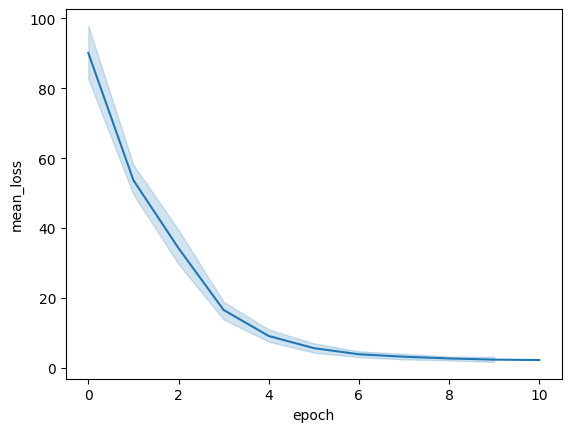

In [14]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#using the gemini-1.0-pro-001
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    display_name="fineTuning-gemmafordl-1",
    source_model=base_model.name,
    epoch_count=10,
    batch_size=4,
    learning_rate=0.001,
    training_data=dataset,
    temperature=0.3,
)

for status in operation.wait_bar():
    time.sleep(10)
result = operation.result()
print(result)
# # You can plot the loss curve with:
snapshots = pd.DataFrame(result.tuning_task.snapshots)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')

model = genai.GenerativeModel(model_name=result.name)
result = model.generate_content("How do you create a model using the Functional API in Keras?")
print(result.text)  # shd give proper

In [17]:
snapshots

,step,mean_loss,epoch,compute_time
0,1,123.914170,0,2024-09-15 01:54:53.422404+00:00
1,2,115.627070,0,2024-09-15 01:54:54.250795+00:00
2,3,103.677635,0,2024-09-15 01:54:55.138575+00:00
3,4,147.606960,0,2024-09-15 01:54:55.873325+00:00
4,5,97.989690,0,2024-09-15 01:54:56.598029+00:00
...,...,...,...,...
280,281,6.068657,9,2024-09-15 01:58:52.372188+00:00
281,282,1.909381,9,2024-09-15 01:58:53.049770+00:00
282,283,0.583945,9,2024-09-15 01:58:53.802243+00:00
283,284,3.141478,9,2024-09-15 01:58:54.753273+00:00


In [20]:
operation.metadata

total_steps: 285
completed_steps: 285
completed_percent: 100.0
snapshots {
  step: 1
  mean_loss: 123.91416931152344
  compute_time {
    seconds: 1726365293
    nanos: 422403831
  }
}
snapshots {
  step: 2
  mean_loss: 115.62706756591797
  compute_time {
    seconds: 1726365294
    nanos: 250795237
  }
}
snapshots {
  step: 3
  mean_loss: 103.6776351928711
  compute_time {
    seconds: 1726365295
    nanos: 138574846
  }
}
snapshots {
  step: 4
  mean_loss: 147.60696411132812
  compute_time {
    seconds: 1726365295
    nanos: 873325078
  }
}
snapshots {
  step: 5
  mean_loss: 97.98969268798828
  compute_time {
    seconds: 1726365296
    nanos: 598028524
  }
}
snapshots {
  step: 6
  mean_loss: 96.13219451904297
  compute_time {
    seconds: 1726365297
    nanos: 381608284
  }
}
snapshots {
  step: 7
  mean_loss: 96.79936218261719
  compute_time {
    seconds: 1726365298
    nanos: 136868641
  }
}
snapshots {
  step: 8
  mean_loss: 62.67908477783203
  compute_time {
    seconds: 1726

In [18]:
model = genai.get_tuned_model('tunedModels/finetuninggemmafordl1-xxcubsl6ftaf')

model

TunedModel(name='tunedModels/finetuninggemmafordl1-xxcubsl6ftaf',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='fineTuning-gemmafordl-1',
           description='',
           temperature=0.3,
           top_p=1.0,
           top_k=0,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 9, 15, 1, 54, 50, 823359, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 15, 1, 58, 57, 63484, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 9, 15, 1, 54, 51, 90125, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 9, 15, 1, 58, 57, 63484, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=10,
                                                     

In [21]:
fine_tuned_model = genai.GenerativeModel(model_name=model.name)
result = fine_tuned_model.generate_content("Explain me about the Sequential Api in keras")

In [22]:
print(result.text)

The Sequential API in Keras groups a linear stack of layers into a Model. It provides a simple and intuitive way to build models where layers are added sequentially. Here's an example:

```python
model = keras.Sequential([
    keras.Input(shape=(None, None, 3)),
    keras.layers.Conv2D(filters=32, kernel_size=3),
    keras.layers.MaxPooling2D(),
])
```
The Sequential API is best suited for models with a straightforward layer stacking pattern. For more complex architectures, consider using the Functional API or the Model subclassing approach.
